In [2]:
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import pickle
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
pass

In [2]:
# Load the time series.
filename = "../data/data_Dkp15_Drl15_memThick2/gradient/cell_rdme_Lmem_gradSteep_t500_1_c1b_0.5e-5_c2b_1.0e-5_c3b_1.0e-3_c0a_4.0e-3_c4_7.0e-3_c5_5.0e-3_c6_4.0e-5_Dk_5.0e-12_Dkp_5.0e-15_Dr_5.0e-12_Drl_5.0e-15.lm"
fp = h5py.File(filename, "r")

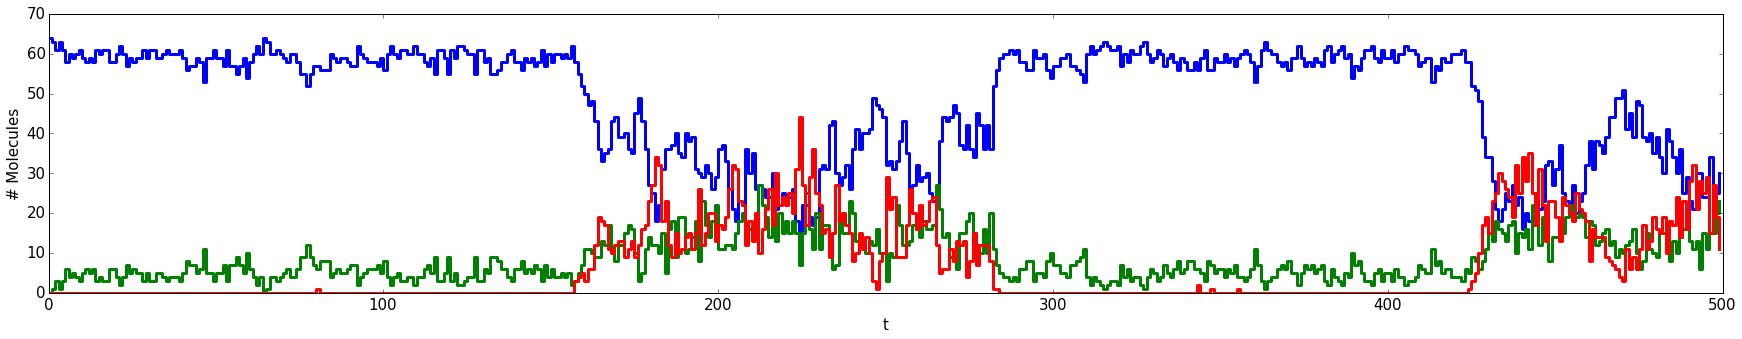

In [3]:
# Plot the time series.
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (30,5)})
replicate=10
times=fp["Simulations/%07d/SpeciesCountTimes"%replicate]
counts=fp["Simulations/%07d/SpeciesCounts"%replicate]
step(times[0:-1],counts[0:-1,0:3], **stepStyles)
xlabel('t'); ylabel('# Molecules')

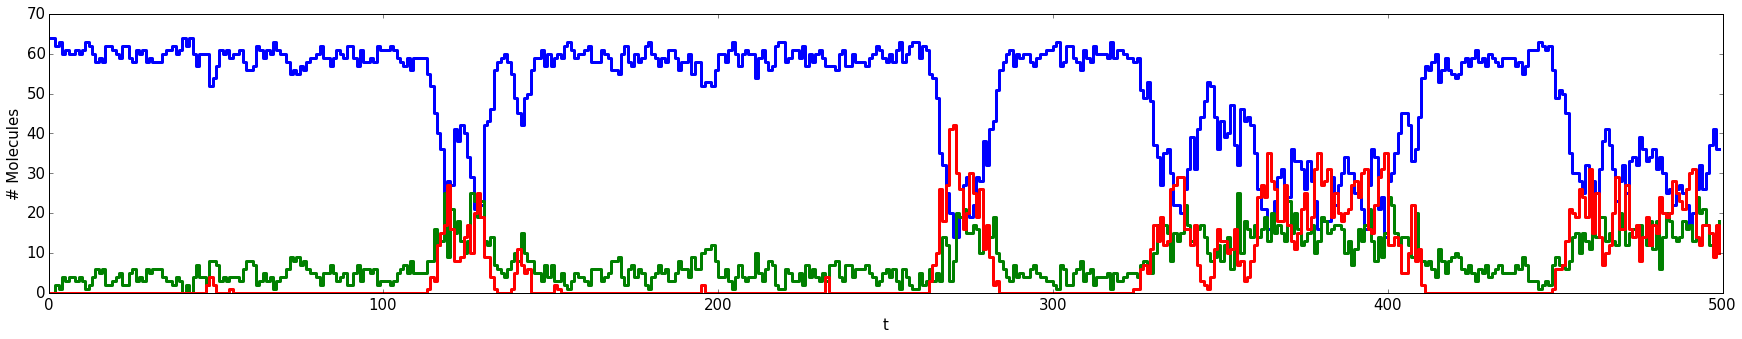

In [4]:
# Plot the time series.
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (30,5)})
replicate=15
times=fp["Simulations/%07d/SpeciesCountTimes"%replicate]
counts=fp["Simulations/%07d/SpeciesCounts"%replicate]
step(times[0:-1:1],counts[0:-1:1,0:3], **stepStyles)
xlabel('t'); ylabel('# Molecules')

In [4]:
# Load the cell model.
filename = "../../data_rdme_Dkp15/cell_modelII_48reps_gradient_0_c1b_1.0e-6_c2b_2.0e-6_c3b_6.0e-5_c0a_5.0e-4_c4_2.0e-4_c5_2.0e-3_c6_2.0e-6_Dk_5.0e-12_Dkp_5.0e-15_Dr_5.0e-12_Drl_5.0e-15.lm"
fp = h5py.File(filename, "r")
latticeSitesH5=fp["/Model/Diffusion/LatticeSites"]
latticeSites = np.zeros(latticeSitesH5.shape, dtype=latticeSitesH5.dtype)
latticeSitesH5.read_direct(latticeSites)
fp.close()
membraneSites=np.argwhere(latticeSites==1)
print "%d membrane sites"%len(membraneSites)
pass

37832 membrane sites


In [6]:
# Load the time-dependent rdme pdf.
filename = "../data/data_Dkp15_Drl15_memThick2/gradient/cell_rdme_Lmem_gradSteep_t500_1_c1b_0.5e-5_c2b_1.0e-5_c3b_1.0e-3_c0a_4.0e-3_c4_7.0e-3_c5_5.0e-3_c6_4.0e-5_Dk_5.0e-12_Dkp_5.0e-15_Dr_5.0e-12_Drl_5.0e-15.lm"
replicate=15
dt=1.0
time=80
species=5
fp = h5py.File(filename, "r")
latticeH5=fp["/Simulations/%07d/Lattice/%010d"%(replicate,time)]
speciesSites = np.zeros(latticeH5.shape, dtype=latticeH5.dtype)
latticeH5.read_direct(speciesSites)
fp.close()
spSites=np.argwhere(speciesSites==species+1)
print "%d species sites"%len(spSites)
pass

104 species sites


In [13]:
# Load the time-dependent rdme pdf.
filename = "../../data_rdme_Dkp15/cell_modelII_48reps_gradient_0_c1b_1.0e-6_c2b_2.0e-6_c3b_6.0e-5_c0a_5.0e-4_c4_2.0e-4_c5_2.0e-3_c6_2.0e-6_Dk_5.0e-12_Dkp_5.0e-15_Dr_5.0e-12_Drl_5.0e-15.lm"
replicate=1
simulation = pickle.load(open('../pdf/counts_gradient/traj_0.0_3000.0_1.p','rb'))
trajectory = simulation[0][1]
timePoints = simulation[0][0]
# print sorted(timePoints)
dt=1.0
species=2
fp = h5py.File(filename, "r")
mxs=[]
mys=[]
mzs=[]
thetabins=40
thetabinwidth=(2.0*math.pi)/thetabins
zbins=25
zbinwidth=50//zbins
maxDensity=8
showCellOutline=True
spacing=0.05

for membraneSite in enumerate(membraneSites):
    p=tuple(membraneSite[1])
#     print p[0],p[1],p[2]
    mxs.append(spacing*p[0])
    mys.append(spacing*p[1])
    mzs.append(spacing*p[2])
    

for time in range(1801,1841):
    print time
#     latticeH5=fp["/Simulations/%07d/Lattice/%010d"%(replicate,time)]
#     speciesSites = np.zeros(latticeH5.shape, dtype=latticeH5.dtype)
#     latticeH5.read_direct(speciesSites)
#     spSites=np.argwhere(speciesSites==species+1)
    speciesSites = trajectory[time,:,:]
#     print speciesSites.shape
#     print speciesSites
    spSites=np.argwhere(speciesSites>0)
    print "%d species sites"%len(spSites)
    xs=[]
    ys=[]
    zs=[]
    vs=[]
    for i  in range(0,500):
        if speciesSites[i,0]>0:
            xs.append(spacing*speciesSites[i,0])
            ys.append(spacing*speciesSites[i,1])
            zs.append(spacing*speciesSites[i,2])
    # Plot the cell.
#     print [ys]
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(mxs, mys, mzs, c='k', s=10, marker='.', edgecolors='none')
    ax.scatter(xs, ys, zs, c='b', s=150, marker='.', edgecolors='none')
#              , cmap=plt.get_cmap("jet"), norm=Normalize(0.0,maxDensity))
    ax.set_xlabel('X (um)')
    ax.set_ylabel('Y (um)')
    ax.set_zlabel('Z (um)')
    ax.set_xlim([0,5.0])
    ax.set_ylim([0,5.0])
    ax.set_zlim([0,5.0])
    ax.invert_xaxis()
    title("Time: %0.1f s"%(float(time)))
    
#     # Plot the 2D histogram.
#     ax = fig.add_subplot(122)
#     ax.matshow(polarBins/polarBinCounts, origin='lower', extent=[-math.pi,math.pi,0,50*spacing], aspect=1.5, cmap=plt.get_cmap("jet"), norm=Normalize(0.0,maxDensity))
#     ax.set_xlabel(r'$\theta$', size=40)
#     ax.set_ylabel('Z (um)')
#     title("Time: %0.2f s"%(float(time)))
    
    # Save the figure.
    print "Saving frame %d: %d, 0.0, %d"%(replicate,time,len(vs))
    plt.tight_layout()
    tmpdir="figures/tmp-%d-%0.6f"%(species,replicate)
    try:
        os.mkdir(tmpdir)
    except:
        pass
    fig.set_size_inches(20, 10)
    fig.tight_layout()
    savefig("%s/frame-%06d.png"%(tmpdir,time), dpi=100, bbox_inches="tight", pad_inches=0.0)
    plt.close(fig)

fp.close()
pass

1801
249 species sites
Saving frame 1: 1801, 0.0, 0
1802
189 species sites
Saving frame 1: 1802, 0.0, 0
1803
216 species sites
Saving frame 1: 1803, 0.0, 0
1804
243 species sites
Saving frame 1: 1804, 0.0, 0
1805
240 species sites
Saving frame 1: 1805, 0.0, 0
1806
342 species sites
Saving frame 1: 1806, 0.0, 0
1807
324 species sites
Saving frame 1: 1807, 0.0, 0
1808
279 species sites
Saving frame 1: 1808, 0.0, 0
1809
321 species sites
Saving frame 1: 1809, 0.0, 0
1810
294 species sites
Saving frame 1: 1810, 0.0, 0
1811
255 species sites
Saving frame 1: 1811, 0.0, 0
1812
297 species sites
Saving frame 1: 1812, 0.0, 0
1813
390 species sites
Saving frame 1: 1813, 0.0, 0
1814
354 species sites
Saving frame 1: 1814, 0.0, 0
1815
351 species sites
Saving frame 1: 1815, 0.0, 0
1816
204 species sites
Saving frame 1: 1816, 0.0, 0
1817
222 species sites
Saving frame 1: 1817, 0.0, 0
1818
330 species sites
Saving frame 1: 1818, 0.0, 0
1819
258 species sites
Saving frame 1: 1819, 0.0, 0
1820
342 spe

In [14]:
import subprocess
import os
filename="figures/%d-%0.6f.mp4"%(species,replicate)
try:
    os.remove(filename)
except:
    pass
cmd="ffmpeg -i %s/frame-%%*.png -an -r 5 -filter:v setpts=5*PTS -b 4000000 -f mp4 -vcodec mpeg4 %s"%(tmpdir,filename)
print cmd
subprocess.call(cmd, shell=True)
# ffmpeg -f mp4 -r 1 -i filename/frame-%06d.png -vcodec mpeg4 -y movie.mp4

ffmpeg -i figures/tmp-2-1.000000/frame-%*.png -an -r 5 -filter:v setpts=5*PTS -b 4000000 -f mp4 -vcodec mpeg4 figures/2-1.000000.mp4


0